## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsClassifier to use the K-NN for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
pd.set_option('display.max_rows', 200)

## Dataframe

In [2]:
churn_df=pd.read_csv("DATA_Customer-Churn.csv")
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


- Check the datatypes of all the columns in the data. 
- You would see that the column TotalCharges is object type. 
- Convert this column into numeric type using pd.to_numeric function.

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

## Converting Total Charges to numerical

In [4]:
churn_df['TotalCharges']=pd.to_numeric(churn_df['TotalCharges'], errors='coerce')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

Check for null values in the dataframe. Replace the null values.

In [5]:
churn_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Filling the NAN with the mean

In [6]:
churn_df['TotalCharges'].fillna((churn_df['TotalCharges'].mean()), inplace=True)

In [7]:
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Define X and y/Data Splitting 

- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [8]:
X=churn_df[['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']]
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [9]:
y=churn_df.Churn
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

## Split the data into a training set and a test set.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

## Scale the features either by using normalizer or a standard scaler.

In [11]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
# transform testing data
X_test_norm = norm.transform(X_test)

## Fit a logistic Regression model on the training data.

,Error_metric,Train,Test
0,Accuracy,0.787362,0.797729
1,Precision,0.650810,0.678862
2,Recall,0.429813,0.447721


Confusion matrix for the train set
[[3793  345]
 [ 853  643]]


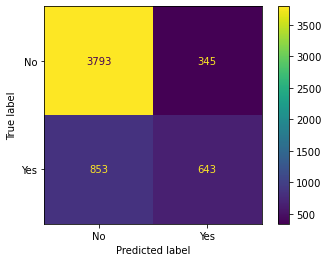



Confusion matrix for the test set
[[957  79]
 [206 167]]


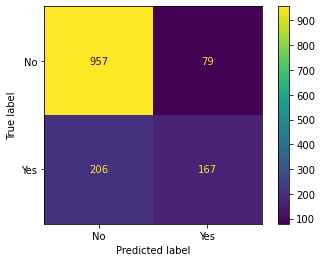

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log, pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Fit a Knn Classifier model on the training data

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=29,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

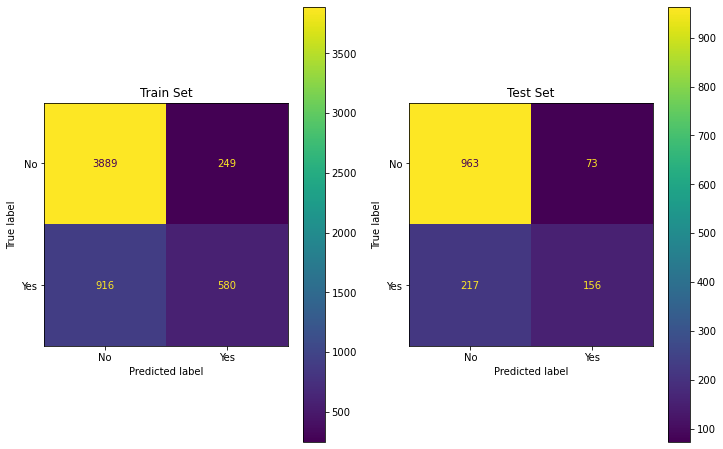

In [40]:
fig, ax = plt.subplots(1,2, figsize=(12,8))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [27]:
knn = pd.DataFrame()

models = {'k': [] }

for k in range(3,30):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_norm, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train_norm)
    y_pred_test_knn  = neigh.predict(X_test_norm)


    temp = pd.DataFrame({'k': [k]*3,'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_knn, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_knn, pos_label="Yes")]})
    knn = pd.concat([knn,temp], axis=0)

knn

,k,Error_metric,Train,Test
0,3,Accuracy,0.861910,0.768630
1,3,Precision,0.777434,0.571429
2,3,Recall,0.672460,0.504021
0,4,Accuracy,0.833156,0.775018
1,4,Precision,0.824009,0.618644
2,4,Recall,0.472594,0.391421
0,5,Accuracy,0.833156,0.775727
1,5,Precision,0.728243,0.592233
2,5,Recall,0.592914,0.490617
0,6,Accuracy,0.827654,0.783534


In [28]:
knn2 = knn.melt(id_vars=['k','Error_metric'])
knn2

,k,Error_metric,variable,value
0,3,Accuracy,Train,0.861910
1,3,Precision,Train,0.777434
2,3,Recall,Train,0.672460
3,4,Accuracy,Train,0.833156
4,4,Precision,Train,0.824009
5,4,Recall,Train,0.472594
6,5,Accuracy,Train,0.833156
7,5,Precision,Train,0.728243
8,5,Recall,Train,0.592914
9,6,Accuracy,Train,0.827654


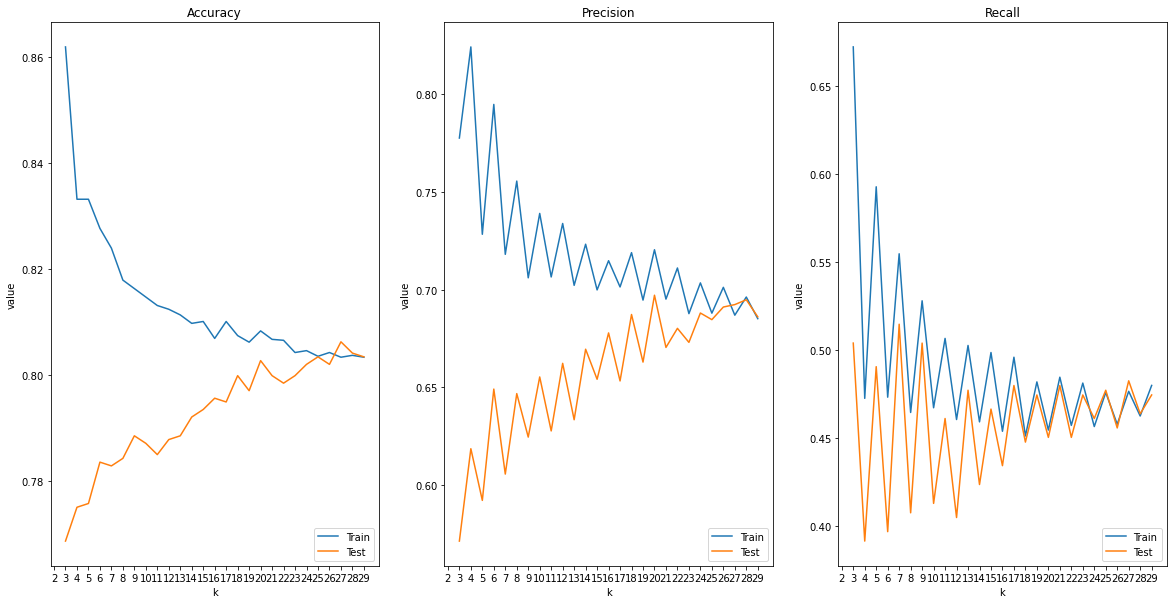

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(1,3, figsize=(20,10))

sns.lineplot(x = 'k', y = 'value', data = knn2[knn2['Error_metric'] == 'Accuracy'], hue = 'variable', ax = ax[0])
ax[0].set_xticks(range(2,30))
ax[0].set_title("Accuracy")
ax[0].legend(loc='lower right')

sns.lineplot(x = 'k', y = 'value', data = knn2[knn2['Error_metric'] == 'Precision'], hue = 'variable', ax = ax[1])
ax[1].set_xticks(range(2,30))
ax[1].set_title("Precision")
ax[1].legend(loc='lower right')

sns.lineplot(x = 'k', y = 'value', data = knn2[knn2['Error_metric'] == 'Recall'], hue = 'variable', ax = ax[2])
ax[2].set_xticks(range(2,30))
ax[2].set_title("Recall")
ax[2].legend(loc='lower right')

## Fit a Decision Tree Classifier on the training data.

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

,Error_metric,Train,Test
0,Accuracy,0.782570,0.792051
1,Precision,0.648738,0.663934
2,Recall,0.395053,0.434316


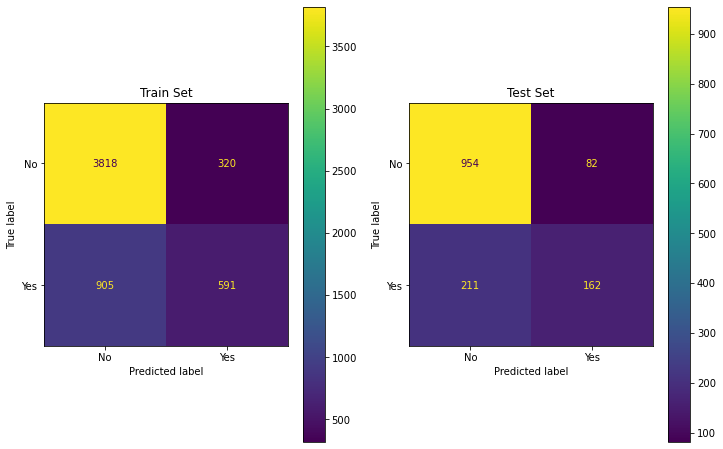

In [43]:
dtc = DecisionTreeClassifier(max_depth=3)

dtc.fit(X_train, y_train)

y_pred_train_dt = dtc.predict(X_train)
y_pred_test_dt = dtc.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(12,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dtc,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dtc,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

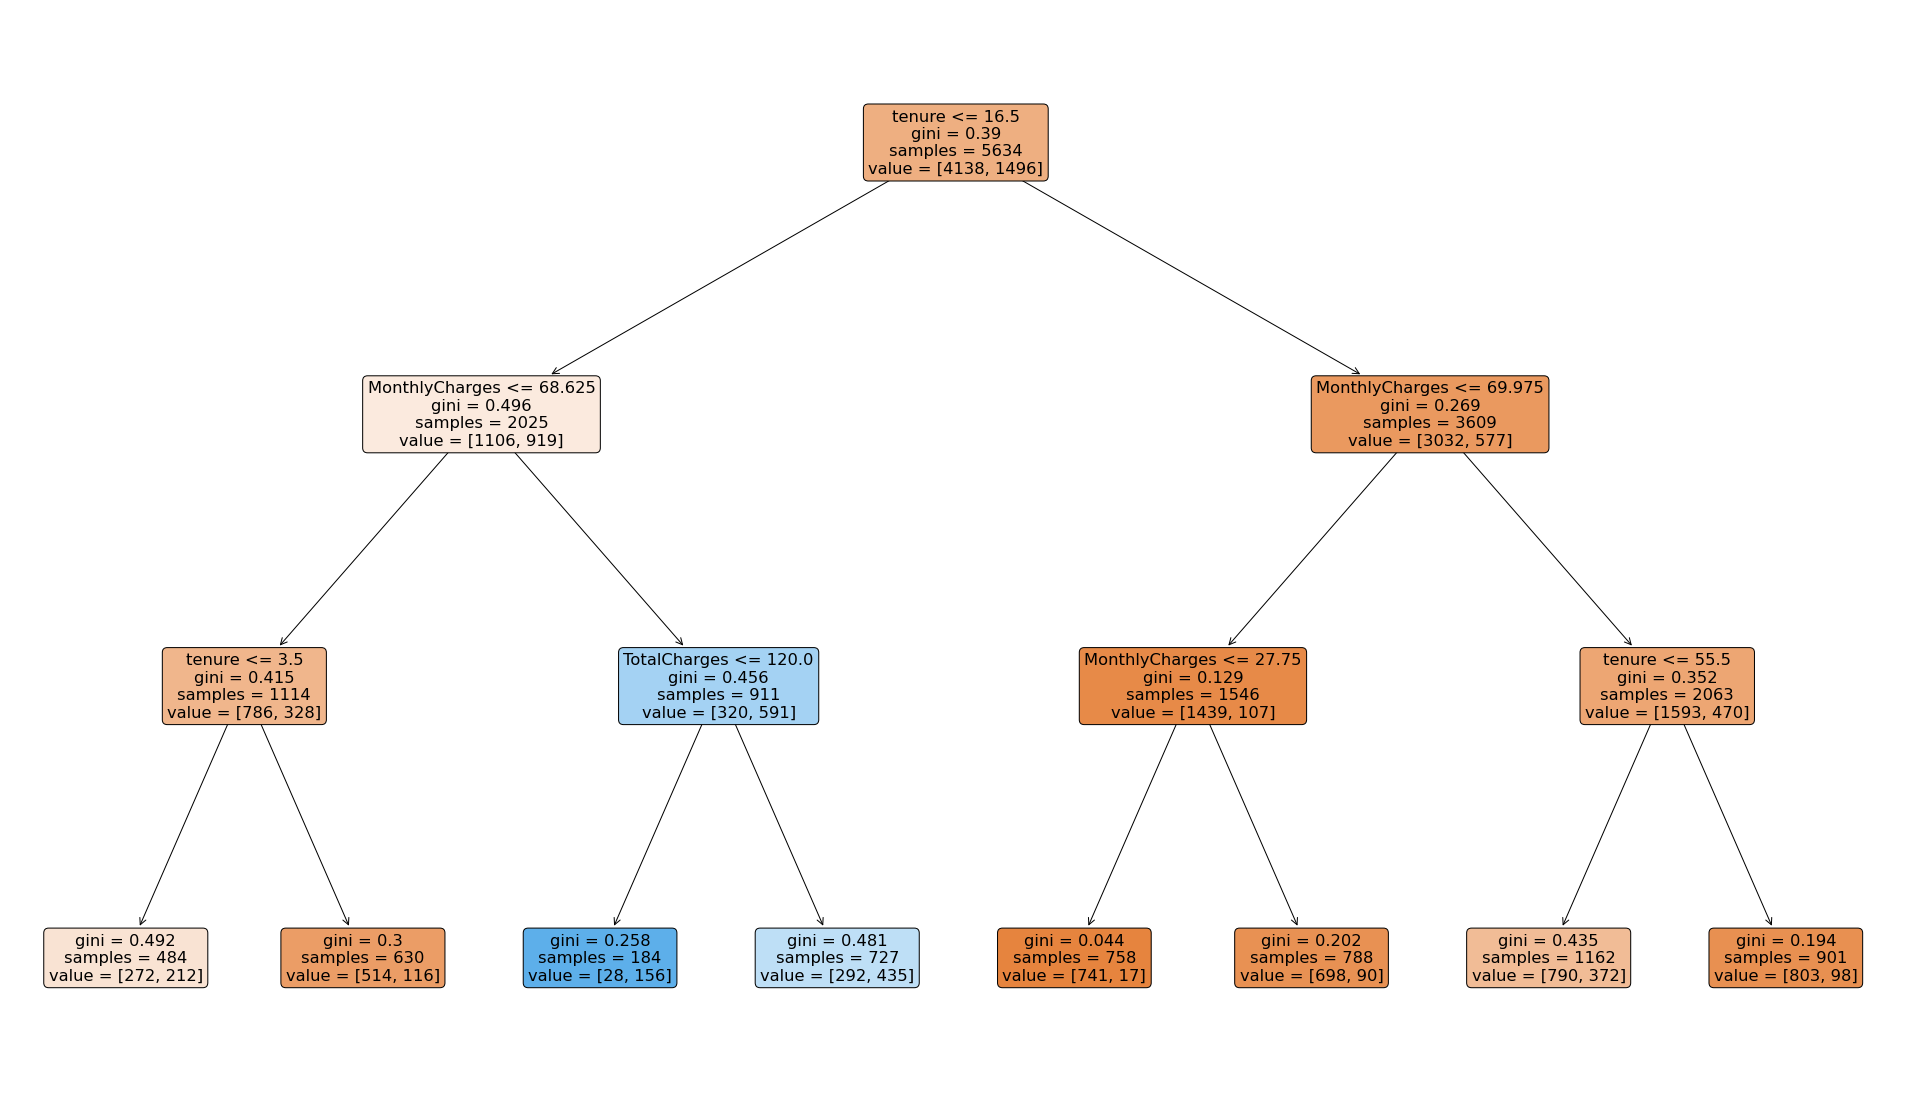

In [44]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dtc,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

## K-fold cross validation and check the model score.